# World Bank Data
Nasdaq API dowload - .csv files

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import time
import plotly

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# WB data set path
WB_totaldata = Path("Resources/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv")

WB_africadata = Path("Resources/WB_africadata_2000")

#African Countries Population data set path
africa_pop = Path("Resources/africa_pop.csv")

In [3]:
# Read in the African Countries Population data file with the Pandas library
africa_pop_df = pd.read_csv(africa_pop)

In [4]:
africa_pop_df

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09
...,...,...,...,...,...,...
1329,1330,2018,Togo,West Africa,7794569,7.029218e+09
1330,1331,2019,Togo,West Africa,7986521,6.992656e+09
1331,1332,2020,Togo,West Africa,8181085,7.389329e+09
1332,1333,2021,Togo,West Africa,8399356,8.334047e+09


In [5]:
#Confirming number of rows in the original African Countries Population dataset
num_africa_pop_df_rows = len(africa_pop_df)
len(africa_pop_df)

1334

In [9]:
african_countries = ["Angola", "Botswana", "Burkina Faso", "Central African Republic", "Chad", "Djibouti", "Egypt, Arab Rep.", "Ethiopia", "Gabon", "Ghana", "Guinea" "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mauritania", "Mozambique", "Nigeria", "Rwanda", "Samoa", "Sao Tome and Principe", "Senegal", "Sierra Leone", "Somalia", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

In [10]:
africa_pop_countries = africa_pop_df[africa_pop_df["Country"].isin(african_countries)]

In [11]:
#Confirming extra countries were removed
num_africa_pop_countries_rows = len(africa_pop_countries)
len(africa_pop_countries)

667

In [12]:
#Creating bins to hold the data based on time periods
bins = [0, 2005, 2010, 2015, 2020, 2023]

# Create labels for these bins
group_labels = ["2000 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2023"]

In [13]:
# Slice the African Countries Population data and place it into bins
pd.cut(africa_pop_countries["Year"], bins, labels=group_labels)

0       2000 - 2005
1       2000 - 2005
2       2000 - 2005
3       2000 - 2005
4       2000 - 2005
           ...     
1329    2016 - 2020
1330    2016 - 2020
1331    2016 - 2020
1332    2021 - 2023
1333    2021 - 2023
Name: Year, Length: 667, dtype: category
Categories (5, object): ['2000 - 2005' < '2006 - 2010' < '2011 - 2015' < '2016 - 2020' < '2021 - 2023']

In [14]:
africa_pop_countries.loc[:, "Year Group"] = pd.cut(africa_pop_countries["Year"], bins, labels=group_labels)

C:\Users\hebir\AppData\Local\Temp\ipykernel_6600\1330741922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_pop_countries.loc[:, "Year Group"] = pd.cut(africa_pop_countries["Year"], bins, labels=group_labels)


In [15]:
africa_pop_countries

,ID,Year,Country,Continent,Population,GDP (USD),Year Group
0,1,2000,Uganda,East Africa,23303189,6.193247e+09,2000 - 2005
1,2,2001,Uganda,East Africa,24022603,5.840504e+09,2000 - 2005
2,3,2002,Uganda,East Africa,24781316,5.840504e+09,2000 - 2005
3,4,2003,Uganda,East Africa,25577246,6.606884e+09,2000 - 2005
4,5,2004,Uganda,East Africa,26403221,7.939488e+09,2000 - 2005
...,...,...,...,...,...,...,...
1329,1330,2018,Togo,West Africa,7794569,7.029218e+09,2016 - 2020
1330,1331,2019,Togo,West Africa,7986521,6.992656e+09,2016 - 2020
1331,1332,2020,Togo,West Africa,8181085,7.389329e+09,2016 - 2020
1332,1333,2021,Togo,West Africa,8399356,8.334047e+09,2021 - 2023


In [16]:
# Read in the WB data file with the Pandas library
WB_totaldata_df = pd.read_csv(WB_totaldata)

In [17]:
WB_totaldata_df

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
3,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
4,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
...,...,...,...
1479,SL.TLF.BASC.FE.ZS,"Labor force with basic education, female (% of...",The ratio of the labor force with basic educat...
1480,SL.GDP.PCAP.EM.KD,GDP per person employed (constant 2021 PPP $),GDP per person employed is gross domestic prod...
1481,SL.TLF.INTM.MA.ZS,"Labor force with intermediate education, male ...",The ratio of the labor force with intermediate...
1482,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or..."


In [18]:
WB_africadata = Path("Resources/WB_africadata_2000.csv")
WB_africadata_df = pd.read_csv(WB_africadata)

In [19]:
WB_africadata_df = WB_africadata_df[WB_africadata_df["country_name"].isin(african_countries)]

In [20]:
WB_africadata_df

,series_id,country_code,country_name,year,value
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05
...,...,...,...,...,...
21556,NE.CON.GOVT.KN,BFA,Burkina Faso,2004,5.351199e+11
21557,NE.CON.GOVT.KN,BWA,Botswana,2004,3.125888e+10
21558,NE.CON.GOVT.KN,EGY,"Egypt, Arab Rep.",2004,2.887384e+11
21559,NE.CON.GOVT.KN,GAB,Gabon,2004,6.151820e+11


In [21]:
WB_africadata_2000_df = WB_africadata_df.loc[WB_africadata_df['year'] >= 2000]
WB_africadata_2000_df

,series_id,country_code,country_name,year,value
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05
...,...,...,...,...,...
21556,NE.CON.GOVT.KN,BFA,Burkina Faso,2004,5.351199e+11
21557,NE.CON.GOVT.KN,BWA,Botswana,2004,3.125888e+10
21558,NE.CON.GOVT.KN,EGY,"Egypt, Arab Rep.",2004,2.887384e+11
21559,NE.CON.GOVT.KN,GAB,Gabon,2004,6.151820e+11


In [22]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
WB_africadata_2000_df.to_csv("Resources\\WB_africadata_2000.csv", encoding="utf-8", index=False)

In [23]:
WB_africadata_2000_df[["year"]].min()

year    2000
dtype: int64

In [24]:
WB_africadata_2000_df[["year"]].max()

year    2023
dtype: int64

In [25]:
WB_africadata_2000_df2 = WB_africadata_2000_df

In [26]:
# Slice the data and place it into bins
pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

0        2016 - 2020
1        2016 - 2020
2        2016 - 2020
3        2016 - 2020
4        2016 - 2020
            ...     
21556    2000 - 2005
21557    2000 - 2005
21558    2000 - 2005
21559    2000 - 2005
21560    2000 - 2005
Name: year, Length: 21561, dtype: category
Categories (5, object): ['2000 - 2005' < '2006 - 2010' < '2011 - 2015' < '2016 - 2020' < '2021 - 2023']

In [27]:
WB_africadata_2000_df2["Year Group"] = pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

In [28]:
WB_africadata_2000_df2

,series_id,country_code,country_name,year,value,Year Group
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04,2016 - 2020
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03,2016 - 2020
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04,2016 - 2020
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03,2016 - 2020
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05,2016 - 2020
...,...,...,...,...,...,...
21556,NE.CON.GOVT.KN,BFA,Burkina Faso,2004,5.351199e+11,2000 - 2005
21557,NE.CON.GOVT.KN,BWA,Botswana,2004,3.125888e+10,2000 - 2005
21558,NE.CON.GOVT.KN,EGY,"Egypt, Arab Rep.",2004,2.887384e+11,2000 - 2005
21559,NE.CON.GOVT.KN,GAB,Gabon,2004,6.151820e+11,2000 - 2005


In [29]:
# WB id series definition data set
WB_metadata = Path("Resources/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv")

In [30]:
# Read data file with the Pandas library
WB_metadata_df = pd.read_csv(WB_metadata)

In [31]:
WB_metadata_df

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
3,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
4,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
...,...,...,...
1479,SL.TLF.BASC.FE.ZS,"Labor force with basic education, female (% of...",The ratio of the labor force with basic educat...
1480,SL.GDP.PCAP.EM.KD,GDP per person employed (constant 2021 PPP $),GDP per person employed is gross domestic prod...
1481,SL.TLF.INTM.MA.ZS,"Labor force with intermediate education, male ...",The ratio of the labor force with intermediate...
1482,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or..."


In [32]:
def key_word(df, search_col, word_txt, result_col):
    i=0   
    result_ls = []
    for item in df[search_col]:
        text_ls = [x.strip() for x in df[search_col][i].split()]
        if word_txt in text_ls:
            result_ls.append(df[result_col][i])
        i+=1
    if i >= df[search_col].count():
        if len(result_ls) > 0:
            return result_ls
        else:
            return print("Keyword Not found")

In [33]:
aid_search = key_word(WB_metadata_df, 'name', 'aid', 'series_id')

In [34]:
len(aid_search)

35

In [35]:
aid_search

['DC.DAC.DEUL.CD',
 'DC.DAC.NLDL.CD',
 'DT.ODA.ALLD.KD',
 'DC.DAC.JPNL.CD',
 'DC.DAC.NORL.CD',
 'DC.DAC.HUNL.CD',
 'DC.DAC.PRTL.CD',
 'DC.DAC.AUTL.CD',
 'DC.DAC.KORL.CD',
 'DC.DAC.ESPL.CD',
 'DC.DAC.CZEL.CD',
 'DC.DAC.CECL.CD',
 'DC.DAC.CHEL.CD',
 'DC.DAC.SVKL.CD',
 'DC.DAC.DNKL.CD',
 'DC.DAC.SWEL.CD',
 'DC.DAC.LUXL.CD',
 'DC.DAC.GBRL.CD',
 'DT.ODA.OATL.KD',
 'DC.DAC.NZLL.CD',
 'DC.DAC.ITAL.CD',
 'DC.DAC.IRLL.CD',
 'DC.DAC.FINL.CD',
 'DC.DAC.GRCL.CD',
 'DC.DAC.BELL.CD',
 'DC.DAC.ISLL.CD',
 'DC.DAC.TOTL.CD',
 'DC.DAC.CANL.CD',
 'DC.DAC.AUSL.CD',
 'DT.ODA.OATL.CD',
 'DC.DAC.USAL.CD',
 'DT.ODA.ALLD.CD',
 'DC.DAC.SVNL.CD',
 'DC.DAC.FRAL.CD',
 'DC.DAC.POLL.CD']

In [36]:
poverty_search = key_word(WB_metadata_df, 'name', 'poverty', 'series_id')

In [37]:
len(poverty_search)

17

In [38]:
corruption_search = key_word(WB_metadata_df, 'name', 'corruption', 'series_id')

In [39]:
len(corruption_search)

1

In [40]:
gdp_search = key_word(WB_metadata_df, 'name', 'GDP', 'series_id')

In [41]:
len(gdp_search)

27

In [42]:
education_search = key_word(WB_metadata_df, 'name', 'education', 'series_id')

In [43]:
len(education_search)

22

In [44]:
WB_aid_df = WB_africadata_2000_df2[WB_africadata_2000_df2["series_id"].isin(aid_search)]

In [45]:
WB_aid_df

,series_id,country_code,country_name,year,value,Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
10073,DC.DAC.AUSL.CD,WSM,Samoa,2022,3.753000e+07,2021 - 2023
10074,DC.DAC.AUSL.CD,ZMB,Zambia,2022,9.400000e+05,2021 - 2023
10075,DC.DAC.AUSL.CD,ZWE,Zimbabwe,2022,3.260000e+06,2021 - 2023
11336,DC.DAC.DNKL.CD,TGO,Togo,2013,3.500000e+05,2011 - 2015


In [46]:
WB_aid_df[["year"]].min()

year    2000
dtype: int64

In [47]:
WB_aid_df[["year"]].max()

year    2022
dtype: int64

In [48]:
WB_aid_df = WB_aid_df.rename(columns = {'value': 'Foreign Aid (USD)'})
WB_aid_df

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
10073,DC.DAC.AUSL.CD,WSM,Samoa,2022,3.753000e+07,2021 - 2023
10074,DC.DAC.AUSL.CD,ZMB,Zambia,2022,9.400000e+05,2021 - 2023
10075,DC.DAC.AUSL.CD,ZWE,Zimbabwe,2022,3.260000e+06,2021 - 2023
11336,DC.DAC.DNKL.CD,TGO,Togo,2013,3.500000e+05,2011 - 2015


In [49]:
# Split up our data into groups based upon 'country_name' and 'Year Group'
WB_aid_groups = WB_aid_df.groupby(['country_name', 'Year Group'], observed=False)
WB_aid_groups.head()

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
10072,DC.DAC.AUSL.CD,UGA,Uganda,2022,4.350000e+06,2021 - 2023
10073,DC.DAC.AUSL.CD,WSM,Samoa,2022,3.753000e+07,2021 - 2023
10074,DC.DAC.AUSL.CD,ZMB,Zambia,2022,9.400000e+05,2021 - 2023
10075,DC.DAC.AUSL.CD,ZWE,Zimbabwe,2022,3.260000e+06,2021 - 2023


In [15]:
# Create a new variable that holds the sum of our groups
sum_aid = WB_aid_groups[['Foreign Aid (USD)']].sum()
sum_aid

NameError: name 'WB_aid_groups' is not defined

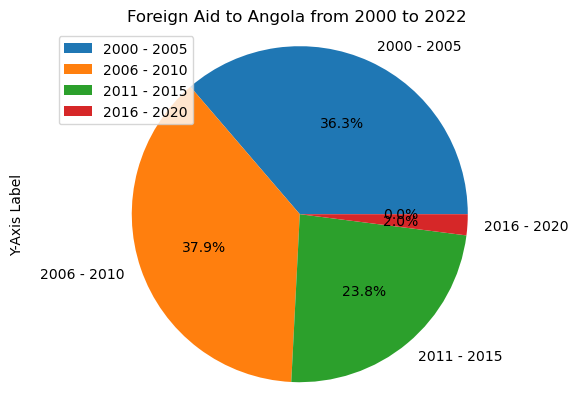

In [51]:
# Make a variable called country and store a 'country_name' in it
country = "Angola"

# Collect all the aid values of the country above
just_one_country = sum_aid.loc[country]

# Create a pie chart based upon the total aid value of that single country
country_pie = just_one_country.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to " + country + " from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Foreign Aid (USD)")
plt.ylabel('Y-Axis Label', labelpad=20)
plt.legend(loc='upper left')
plt.axis("equal")

plt.show()

In [52]:
total_aid = WB_aid_df.groupby("Year Group", observed=False)["Foreign Aid (USD)"].sum()
total_aid

Year Group
2000 - 2005    2.083900e+08
2006 - 2010    4.369900e+08
2011 - 2015    9.952600e+08
2016 - 2020    3.520400e+08
2021 - 2023    1.432900e+08
Name: Foreign Aid (USD), dtype: float64

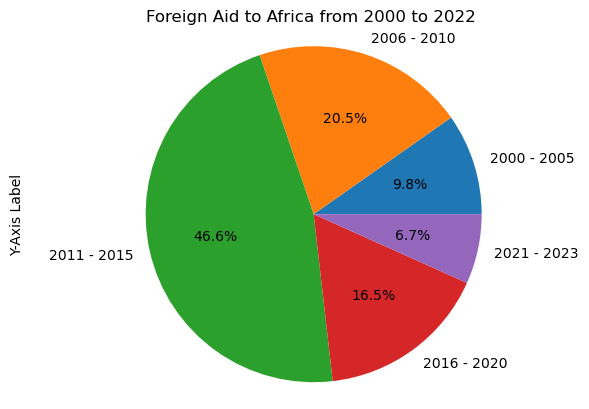

In [53]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
aid_pie = total_aid.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to Africa from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Foreign Aid (USD)")
plt.ylabel('Y-Axis Label', labelpad=30)

plt.axis("equal")
plt.show()

In [54]:
# Split up our data into groups based upon 'country_name' and 'Year Group'
WB_aid_country_groups = WB_aid_df.groupby(['Year Group', 'country_name'], observed=False)
WB_aid_country_groups.head()

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
10072,DC.DAC.AUSL.CD,UGA,Uganda,2022,4.350000e+06,2021 - 2023
10073,DC.DAC.AUSL.CD,WSM,Samoa,2022,3.753000e+07,2021 - 2023
10074,DC.DAC.AUSL.CD,ZMB,Zambia,2022,9.400000e+05,2021 - 2023
10075,DC.DAC.AUSL.CD,ZWE,Zimbabwe,2022,3.260000e+06,2021 - 2023


In [16]:
# Create a new variable that holds the sum of our groups
sum_country_up = WB_aid_country_groups[['Foreign Aid (USD)']].sum()
sum_country_up

NameError: name 'WB_aid_country_groups' is not defined

In [56]:
country_aid = sum_country_up.groupby("country_name")["Foreign Aid (USD)"].sum()
country_aid

country_name
Angola                      2.480000e+06
Botswana                    1.628000e+07
Burkina Faso                1.386000e+07
Central African Republic    2.015000e+07
Chad                        1.065000e+07
Djibouti                    1.010000e+06
Egypt, Arab Rep.            9.152000e+07
Ethiopia                    1.173100e+08
Gabon                       3.000000e+05
Ghana                       3.538000e+07
Kenya                       1.542600e+08
Lesotho                     1.118000e+07
Liberia                     1.963000e+07
Madagascar                  5.050000e+06
Malawi                      8.062000e+07
Mauritania                  1.160000e+06
Mozambique                  1.214900e+08
Nigeria                     3.209000e+07
Rwanda                      2.928000e+07
Samoa                       5.329600e+08
Sao Tome and Principe       7.500000e+05
Senegal                     6.390000e+06
Sierra Leone                2.365000e+07
Somalia                     1.598400e+08
Sud

In [57]:
sum_country_up2 = sum_country_up.reset_index()

In [58]:
africa_aid_pivot = sum_country_up2.pivot(index='country_name', columns='Year Group', values='Foreign Aid (USD)')
africa_aid_pivot

Year Group,2000 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,2021 - 2023
country_name,,,,,
Angola,9.000000e+05,9.400000e+05,5.900000e+05,5.000000e+04,0.000000e+00
Botswana,8.100000e+05,1.570000e+06,9.340000e+06,4.160000e+06,4.000000e+05
Burkina Faso,0.000000e+00,4.200000e+05,4.110000e+06,9.270000e+06,6.000000e+04
Central African Republic,0.000000e+00,8.700000e+05,7.070000e+06,8.950000e+06,3.260000e+06
Chad,4.050000e+06,1.430000e+06,5.120000e+06,1.000000e+04,4.000000e+04
Djibouti,0.000000e+00,2.800000e+05,6.500000e+05,7.000000e+04,1.000000e+04
"Egypt, Arab Rep.",3.610000e+07,2.971000e+07,2.450000e+07,9.900000e+05,2.200000e+05
Ethiopia,1.189000e+07,1.981000e+07,6.037000e+07,1.353000e+07,1.171000e+07
Gabon,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00


In [59]:
africa_aid_pivot2 = pd.concat([africa_aid_pivot, country_aid], axis=1)
africa_aid_pivot2

,2000 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,2021 - 2023,Foreign Aid (USD)
country_name,,,,,,
Angola,9.000000e+05,9.400000e+05,5.900000e+05,5.000000e+04,0.000000e+00,2.480000e+06
Botswana,8.100000e+05,1.570000e+06,9.340000e+06,4.160000e+06,4.000000e+05,1.628000e+07
Burkina Faso,0.000000e+00,4.200000e+05,4.110000e+06,9.270000e+06,6.000000e+04,1.386000e+07
Central African Republic,0.000000e+00,8.700000e+05,7.070000e+06,8.950000e+06,3.260000e+06,2.015000e+07
Chad,4.050000e+06,1.430000e+06,5.120000e+06,1.000000e+04,4.000000e+04,1.065000e+07
Djibouti,0.000000e+00,2.800000e+05,6.500000e+05,7.000000e+04,1.000000e+04,1.010000e+06
"Egypt, Arab Rep.",3.610000e+07,2.971000e+07,2.450000e+07,9.900000e+05,2.200000e+05,9.152000e+07
Ethiopia,1.189000e+07,1.981000e+07,6.037000e+07,1.353000e+07,1.171000e+07,1.173100e+08
Gabon,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00,3.000000e+05


In [60]:
africa_aid_pivot2 = africa_aid_pivot2.rename(columns = {'2000 - 2005': 'Aid 2000 - 2005', '2006 - 2010': 'Aid 2006 - 2010','2011 - 2015': 'Aid 2011 - 2015', '2016 - 2020': 'Aid 2016 - 2020', '2021 - 2023': 'Aid 2021 - 2022', 'Foreign Aid (USD)': 'Total Foreign Aid (USD)'})
africa_aid_pivot2

,Aid 2000 - 2005,Aid 2006 - 2010,Aid 2011 - 2015,Aid 2016 - 2020,Aid 2021 - 2022,Total Foreign Aid (USD)
country_name,,,,,,
Angola,9.000000e+05,9.400000e+05,5.900000e+05,5.000000e+04,0.000000e+00,2.480000e+06
Botswana,8.100000e+05,1.570000e+06,9.340000e+06,4.160000e+06,4.000000e+05,1.628000e+07
Burkina Faso,0.000000e+00,4.200000e+05,4.110000e+06,9.270000e+06,6.000000e+04,1.386000e+07
Central African Republic,0.000000e+00,8.700000e+05,7.070000e+06,8.950000e+06,3.260000e+06,2.015000e+07
Chad,4.050000e+06,1.430000e+06,5.120000e+06,1.000000e+04,4.000000e+04,1.065000e+07
Djibouti,0.000000e+00,2.800000e+05,6.500000e+05,7.000000e+04,1.000000e+04,1.010000e+06
"Egypt, Arab Rep.",3.610000e+07,2.971000e+07,2.450000e+07,9.900000e+05,2.200000e+05,9.152000e+07
Ethiopia,1.189000e+07,1.981000e+07,6.037000e+07,1.353000e+07,1.171000e+07,1.173100e+08
Gabon,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00,3.000000e+05


In [61]:
poverty_search

['SH.UHC.NOP2.TO',
 'SH.UHC.NOP2.ZS',
 'SH.UHC.NOP1.ZS',
 'SH.UHC.NOP1.ZG',
 'SH.UHC.NOP1.CG',
 'SH.UHC.NOP2.CG',
 'SH.UHC.NOP1.TO',
 'SH.UHC.NOP2.ZG',
 'SI.POV.MDIM.17.XQ',
 'SI.POV.MDIM.MA',
 'SI.POV.MDIM.XQ',
 'SI.POV.MDIM.FE',
 'SI.POV.MDIM.HH',
 'SI.POV.MDIM',
 'SI.POV.MDIM.17',
 'SI.POV.NAHC',
 'SI.POV.MDIM.IT']

In [62]:
poverty_search2 = WB_metadata_df[WB_metadata_df['series_id'].isin(poverty_search)]

In [63]:
poverty_search2

,series_id,name,description
19,SH.UHC.NOP2.TO,Number of people pushed below the $3.65 ($ 201...,Number of people pushed below the $3.65 ($ 201...
103,SH.UHC.NOP2.ZS,Proportion of population pushed below the $3.6...,This indicator shows the fraction of a country...
143,SH.UHC.NOP1.ZS,Proportion of population pushed below the $2.1...,This indicator shows the fraction of a country...
527,SH.UHC.NOP1.ZG,Increase in poverty gap at $1.90 ($ 2011 PPP) ...,Increase in poverty gap at $1.90 ($ 2011 PPP) ...
528,SH.UHC.NOP1.CG,Increase in poverty gap at $1.90 ($ 2011 PPP) ...,Increase in poverty gap at $1.90 ($ 2011 PPP) ...
529,SH.UHC.NOP2.CG,Increase in poverty gap at $3.20 ($ 2011 PPP) ...,Increase in poverty gap at $3.20 ($ 2011 PPP) ...
546,SH.UHC.NOP1.TO,Number of people pushed below the $2.15 ($ 201...,Number of people pushed below the $2.15 ($ 201...
926,SH.UHC.NOP2.ZG,Increase in poverty gap at $3.20 ($ 2011 PPP) ...,Increase in poverty gap at $3.20 ($ 2011 PPP) ...
1271,SI.POV.MDIM.17.XQ,"Multidimensional poverty index, children (popu...",Proportion of the child population that is mul...
1305,SI.POV.MDIM.MA,"Multidimensional poverty headcount ratio, male...",The percentage of male population who are mult...


In [64]:
WB_poverty_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SI.POV.MDIM.XQ"]
WB_poverty_df

,series_id,country_code,country_name,year,value,Year Group


In [65]:
WB_poverty_country_groups = WB_poverty_df.groupby(['Year Group', 'country_name'], observed=False)
WB_poverty_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group


In [66]:
unique_values = WB_africadata_2000_df2['series_id'].unique()
unique_count = len(unique_values)
unique_count

83

In [69]:
# Set x axis and tick locations
#x_axis = np.arange(len(WB_aid_ls2))
#tick_locations = [value for value in x_axis]

In [71]:
#WB_aid_grouped_df = WB_aid_2000_df2.groupby("Year Group")

In [73]:
# Find how many rows fall into each bin
#print(WB_aid_grouped_df["Year Group"].count())

In [74]:
unique_values, counts = np.unique(WB_africadata_2000_df2['series_id'], return_counts=True)

# Print the unique values and their counts
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: ['AG.LND.ARBL.ZS' 'AG.LND.EL5M.RU.K2' 'AG.LND.EL5M.RU.ZS' 'AG.LND.PRCP.MM'
 'AG.LND.TOTL.RU.K2' 'AG.PRD.CROP.XD' 'AG.PRD.FOOD.XD' 'AG.PRD.LVSK.XD'
 'BG.GSR.NFSV.GD.ZS' 'BN.CAB.XOKA.CD' 'BN.GSR.MRCH.CD' 'BN.KLT.DINV.CD'
 'BX.GSR.ROYL.CD' 'CC.NO.SRC' 'CC.PER.RNK.LOWER' 'DC.DAC.AUSL.CD'
 'DC.DAC.DEUL.CD' 'DC.DAC.DNKL.CD' 'DT.TDS.DPPF.XP.ZS' 'EG.ELC.ACCS.RU.ZS'
 'EG.ELC.PETR.ZS' 'EN.MAM.THRD.NO' 'EN.POP.EL5M.RU.ZS' 'EN.URB.MCTY.TL.ZS'
 'ER.FSH.CAPT.MT' 'ER.H2O.FWAG.ZS' 'FP.CPI.TOTL.ZG' 'GC.TAX.GSRV.CN'
 'GC.TAX.INTT.CN' 'HD.HCI.OVRL.FE' 'IC.REG.COST.PC.FE.ZS' 'IC.REG.PROC.MA'
 'IQ.SCI.MTHD' 'MS.MIL.TOTL.TF.ZS' 'NE.CON.GOVT.KN' 'NE.EXP.GNFS.KD.ZG'
 'NY.ADJ.DMIN.GN.ZS' 'NY.ADJ.DNGY.CD' 'NY.ADJ.NNTY.KD.ZG' 'NY.ADJ.SVNX.CD'
 'NY.GDP.DEFL.KD.ZG' 'NY.GDP.DISC.CN' 'NY.GDP.DISC.KN' 'NY.GDP.MKTP.CN.AD'
 'NY.GDP.PETR.RT.ZS' 'NY.GNP.MKTP.CN' 'SE.ENR.PRSC.FM.ZS'
 'SE.PRM.PRS5.FE.ZS' 'SE.PRM.TCAQ.MA.ZS' 'SE.PRM.UNER' 'SE.SEC.AGES'
 'SE.SEC.CMPT.LO.MA.ZS' 'SE.SEC.ENRL.GC.FE.ZS' 'SE.SEC.EN

In [75]:
Poverty_search = key_word(WB_metadata_df, 'name', 'Poverty', 'series_id')

In [76]:
Poverty_search

['SI.POV.UMIC.GP',
 'SI.POV.DDAY',
 'SI.POV.LMIC.GP',
 'SI.POV.LMIC',
 'SI.POV.UMIC',
 'SI.POV.NAHC',
 'SI.POV.GAPS']

In [77]:
 Poverty_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(Poverty_search)]

In [78]:
Poverty_search2

,series_id,name,description
85,SI.POV.UMIC.GP,Poverty gap at $6.85 a day (2017 PPP) (%),Poverty gap at $6.85 a day (2017 PPP) is the m...
148,SI.POV.DDAY,Poverty headcount ratio at $2.15 a day (2017 P...,Poverty headcount ratio at $2.15 a day is the ...
624,SI.POV.LMIC.GP,Poverty gap at $3.65 a day (2017 PPP) (%),Poverty gap at $3.65 a day (2017 PPP) is the m...
1074,SI.POV.LMIC,Poverty headcount ratio at $3.65 a day (2017 P...,Poverty headcount ratio at $3.65 a day is the ...
1169,SI.POV.UMIC,Poverty headcount ratio at $6.85 a day (2017 P...,Poverty headcount ratio at $6.85 a day is the ...
1314,SI.POV.NAHC,Poverty headcount ratio at national poverty li...,National poverty headcount ratio is the percen...
1318,SI.POV.GAPS,Poverty gap at $2.15 a day (2017 PPP) (%),Poverty gap at $2.15 a day (2017 PPP) is the m...


In [79]:
WB_Poverty_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SI.POV.UMIC"]
WB_Poverty_df

,series_id,country_code,country_name,year,value,Year Group


In [80]:
# Create a new variable that holds the sum of our groups
avg_Poverty = WB_Poverty_df[['value']].mean()
avg_Poverty

value   NaN
dtype: float64

In [81]:
WB_Pov_country_groups = WB_Poverty_df.groupby(['Year Group', 'country_name'], observed=False)
WB_Pov_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group


In [82]:
avg_Poverty = WB_Pov_country_groups[['value']].mean()
avg_Poverty

,,value
Year Group,country_name,


In [83]:
avg_Poverty.dropna(how='all')

,,value
Year Group,country_name,


In [84]:
total_Pov = WB_Poverty_df.groupby("Year Group", observed=False)["value"].mean()
total_Pov

Year Group
2000 - 2005   NaN
2006 - 2010   NaN
2011 - 2015   NaN
2016 - 2020   NaN
2021 - 2023   NaN
Name: value, dtype: float64

In [85]:
WB_Poverty_df_cleaned = WB_Poverty_df.dropna(subset=['value'])

In [87]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
#Pverty_pie = WB_Poverty_df_cleaned.groupby("Year Group")["value"].mean().plot(kind="pie", y='value', title=("Poverty headcount ratio at $6.85 a day"), autopct="%1.1f%%")                                                                   
#country_pie.set_ylabel("value")

#plt.axis("equal")
#plt.show()

In [89]:
#sumPOV = totalPov

In [90]:
WB_africadata_2000_df2
country_counts = WB_africadata_2000_df2['country_name'].value_counts()

print("Counts of entries for each country name:")
print(country_counts)

Counts of entries for each country name:
country_name
Ghana                       808
Madagascar                  797
Senegal                     790
Botswana                    787
Burkina Faso                781
Lesotho                     777
Tanzania                    774
Tunisia                     770
Kenya                       764
Egypt, Arab Rep.            764
Ethiopia                    757
Uganda                      756
Mozambique                  745
Togo                        737
Rwanda                      733
Angola                      726
Sudan                       724
Zambia                      696
Sierra Leone                683
Malawi                      681
Mauritania                  670
Zimbabwe                    665
Gabon                       644
Samoa                       638
Nigeria                     633
Djibouti                    600
Sao Tome and Principe       593
Chad                        563
Central African Republic    554
Liberia           

In [91]:
WB_africadata_2000_df2
pov_counts = WB_Poverty_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(pov_counts)

Counts of entries for each country name:
Series([], Name: count, dtype: int64)


In [92]:
WB_africadata_2000_df2
aid_counts = WB_aid_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(aid_counts)

Counts of entries for each country name:
country_name
Kenya                       23
Zambia                      23
Samoa                       23
Tanzania                    23
Egypt, Arab Rep.            22
Ghana                       22
Zimbabwe                    22
Mozambique                  22
Malawi                      22
Sudan                       21
Sierra Leone                21
Ethiopia                    21
Uganda                      21
Somalia                     20
Botswana                    20
Nigeria                     20
Lesotho                     20
Rwanda                      17
Senegal                     16
Chad                        16
Madagascar                  15
Liberia                     14
Central African Republic    12
Sao Tome and Principe       12
Tunisia                     12
Angola                      11
Burkina Faso                11
Togo                        11
Djibouti                    11
Mauritania                   9
Gabon           

In [93]:
Mortality_search = key_word(WB_metadata_df, 'name', 'Mortality', 'series_id')

In [94]:
Mortality_search

['SH.STA.AIRP.MA.P5',
 'SH.DYN.NCOM.FE.ZS',
 'SP.DYN.AMRT.FE',
 'SH.DYN.MORT.FE',
 'SH.DYN.MORT.MA',
 'SH.STA.WASH.P5',
 'SP.DYN.IMRT.MA.IN',
 'SP.DYN.IMRT.IN',
 'SH.DYN.MORT',
 'SP.DYN.AMRT.MA',
 'SH.STA.TRAF.P5',
 'SH.STA.AIRP.FE.P5',
 'SH.DYN.NMRT',
 'SH.STA.AIRP.P5',
 'SH.STA.POIS.P5.MA',
 'SH.STA.POIS.P5',
 'SH.STA.POIS.P5.FE',
 'SH.DYN.NCOM.MA.ZS',
 'SP.DYN.IMRT.FE.IN',
 'SH.DYN.NCOM.ZS']

In [95]:
Mortality_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(Mortality_search)]

In [96]:
Mortality_search2

,series_id,name,description
35,SH.STA.AIRP.MA.P5,Mortality rate attributed to household and amb...,Mortality rate attributed to household and amb...
100,SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD be...","Mortality from CVD, cancer, diabetes or CRD is..."
106,SP.DYN.AMRT.FE,"Mortality rate, adult, female (per 1,000 femal...","Adult mortality rate, female, is the probabili..."
186,SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000 liv...","Under-five mortality rate, female is the proba..."
239,SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000 live ...","Under-five mortality rate, male is the probabi..."
281,SH.STA.WASH.P5,"Mortality rate attributed to unsafe water, uns...","Mortality rate attributed to unsafe water, uns..."
297,SP.DYN.IMRT.MA.IN,"Mortality rate, infant, male (per 1,000 live b...","Infant mortality rate, male is the number of m..."
354,SP.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)",Infant mortality rate is the number of infants...
356,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",Under-five mortality rate is the probability p...
481,SP.DYN.AMRT.MA,"Mortality rate, adult, male (per 1,000 male ad...","Adult mortality rate, male, is the probability..."


In [97]:
WB_Mortality_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SH.STA.WASH.P5"]
WB_Mortality_df

,series_id,country_code,country_name,year,value,Year Group


In [98]:
Mortality_counts = WB_Mortality_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(Mortality_counts)

Counts of entries for each country name:
Series([], Name: count, dtype: int64)


In [99]:
education_search

['SE.SEC.TCAQ.UP.ZS',
 'SL.TLF.INTM.ZS',
 'SL.TLF.BASC.ZS',
 'NY.ADJ.AEDU.CD',
 'SL.UEM.BASC.ZS',
 'SE.PRE.TCAQ.ZS',
 'SL.TLF.ADVN.ZS',
 'SE.XPD.CSEC.ZS',
 'SE.XPD.CTER.ZS',
 'SE.XPD.CTOT.ZS',
 'SE.XPD.PRIM.ZS',
 'SE.XPD.CPRM.ZS',
 'SE.XPD.SECO.ZS',
 'NY.ADJ.AEDU.GN.ZS',
 'FX.OWN.TOTL.PL.ZS',
 'SE.SEC.TCAQ.ZS',
 'SE.SEC.TCAQ.LO.ZS',
 'SE.PRM.TCAQ.ZS',
 'SE.XPD.TERT.ZS',
 'SL.UEM.ADVN.ZS',
 'FX.OWN.TOTL.SO.ZS',
 'SL.UEM.INTM.ZS']

In [100]:
education_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(education_search)]

In [101]:
education_search2

,series_id,name,description
70,SE.SEC.TCAQ.UP.ZS,Trained teachers in upper secondary education ...,Trained teachers in upper secondary education ...
88,SL.TLF.INTM.ZS,Labor force with intermediate education (% of ...,The ratio of the labor force with intermediate...
202,SL.TLF.BASC.ZS,Labor force with basic education (% of total w...,The ratio of the labor force with basic educat...
211,NY.ADJ.AEDU.CD,Adjusted savings: education expenditure (curre...,Education expenditure refers to the current op...
263,SL.UEM.BASC.ZS,Unemployment with basic education (% of total ...,The percentage of the labor force with a basic...
300,SE.PRE.TCAQ.ZS,Trained teachers in preprimary education (% of...,Trained teachers in preprimary education are t...
342,SL.TLF.ADVN.ZS,Labor force with advanced education (% of tota...,The ratio of the labor force with advanced edu...
584,SE.XPD.CSEC.ZS,"Current education expenditure, secondary (% of...",Current expenditure is expressed as a percenta...
611,SE.XPD.CTER.ZS,"Current education expenditure, tertiary (% of ...",Current expenditure is expressed as a percenta...
621,SE.XPD.CTOT.ZS,"Current education expenditure, total (% of tot...",Current expenditure is expressed as a percenta...


In [102]:
WB_education_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'].isin(["SE.SEC.CUAT.LO.ZS", "SE.SEC.CUAT.UP.ZS", "SE.TER.CUAT.MS.ZS" ])]
WB_education_df

,series_id,country_code,country_name,year,value,Year Group


In [103]:
education_counts = WB_education_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(education_counts)

Counts of entries for each country name:
Series([], Name: count, dtype: int64)


In [104]:
WB_education_country_groups = WB_education_df.groupby(['Year Group', 'country_name'], observed=False)
WB_education_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group


In [105]:
avg_education = WB_education_country_groups[['value']].mean()
avg_education

,,value
Year Group,country_name,


In [106]:
avg_education['value']

Series([], Name: value, dtype: float64)

In [107]:
result = WB_education_df[WB_education_df['country_name'].str.contains('Senegal')]
result

,series_id,country_code,country_name,year,value,Year Group


In [4]:
import plotly.express as px